# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# to display stats about data for Statistical Insights
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

In [7]:
# check if there any duplicates in the dataset
df.duplicated().sum()

3

In [8]:
# this shows the actual duplicate rows
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [9]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

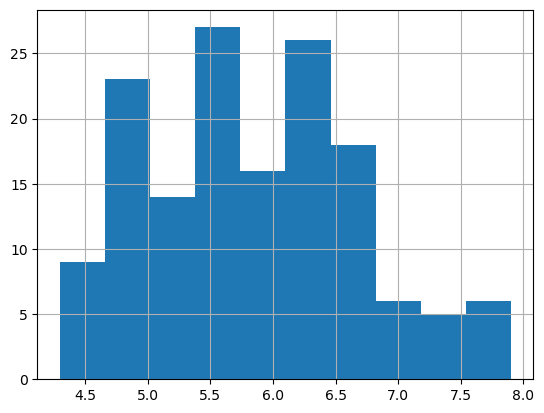

In [10]:
# histograms
df['SepalLengthCm'].hist()

<AxesSubplot:>

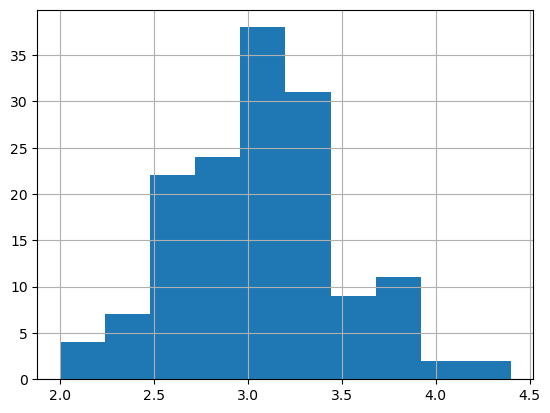

In [11]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

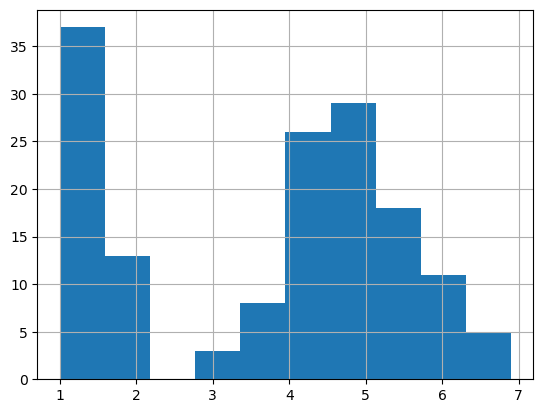

In [12]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

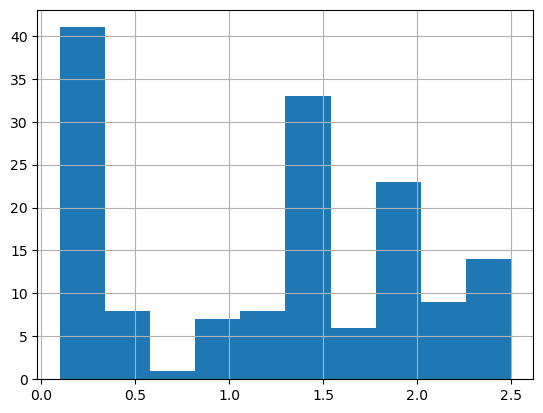

In [13]:
df['PetalWidthCm'].hist()

<AxesSubplot:title={'center':'Species Count'}, xlabel='Species', ylabel='count'>

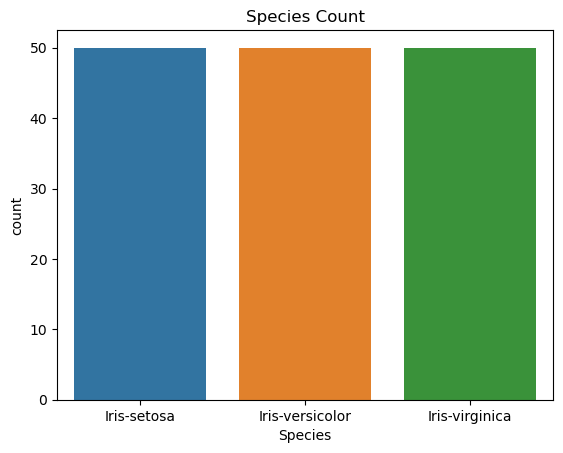

In [14]:
# Count plot on single categorical variable
plt.title('Species Count')
sns.countplot(x = "Species", data = df)

In [15]:
colors = ['orange', 'purple', 'green']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

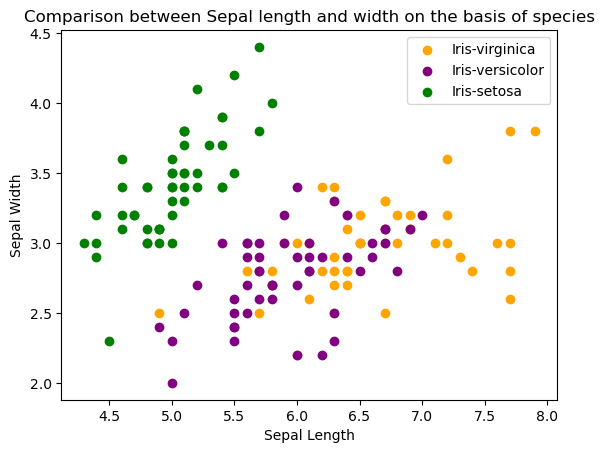

In [16]:
plt.title('Comparison between Sepal length and width on the basis of species')
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

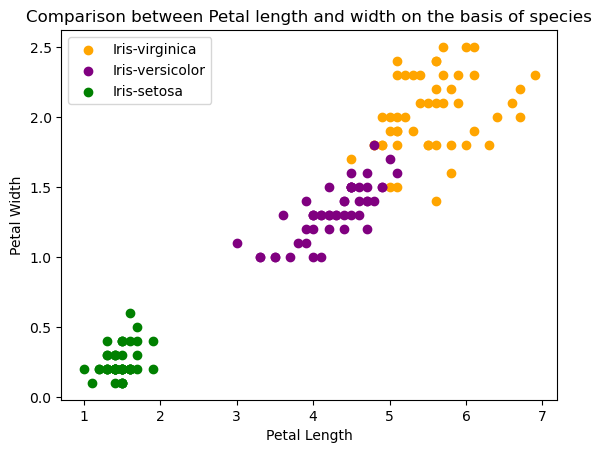

In [17]:
plt.title('Comparison between Petal length and width on the basis of species')
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

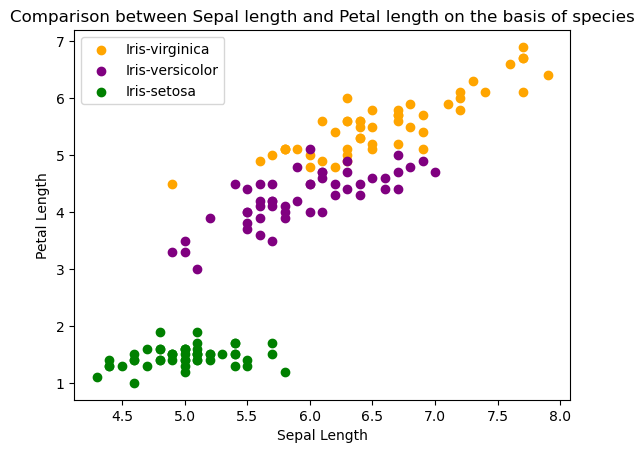

In [18]:
plt.title('Comparison between Sepal length and Petal length on the basis of species')
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

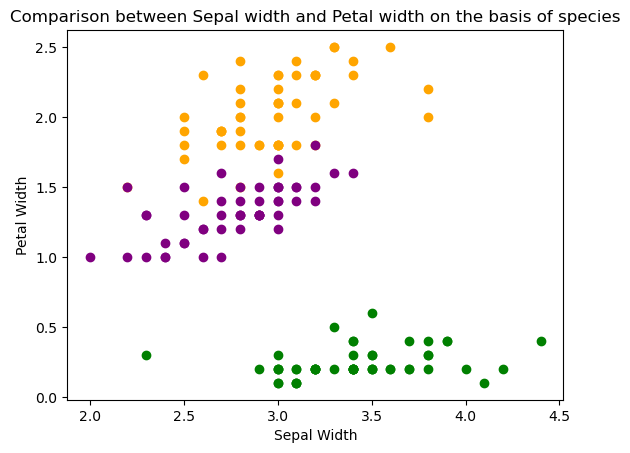

In [19]:
plt.title('Comparison between Sepal width and Petal width on the basis of species')
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend

# Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two, if one is causing other.

In [20]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

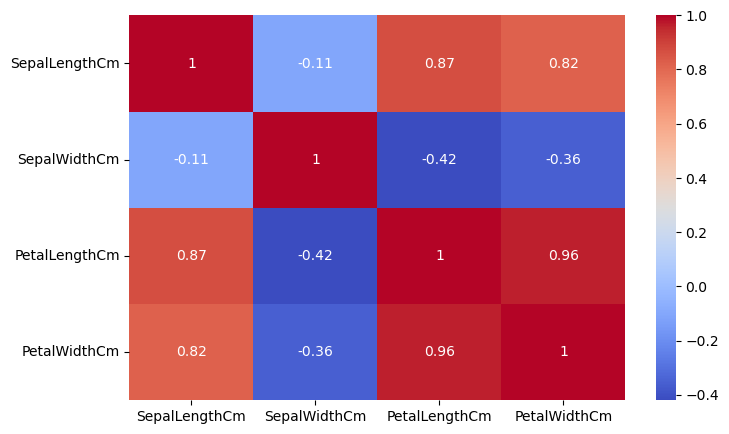

In [38]:
# Correlation using a Heatmap
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap = 'coolwarm')

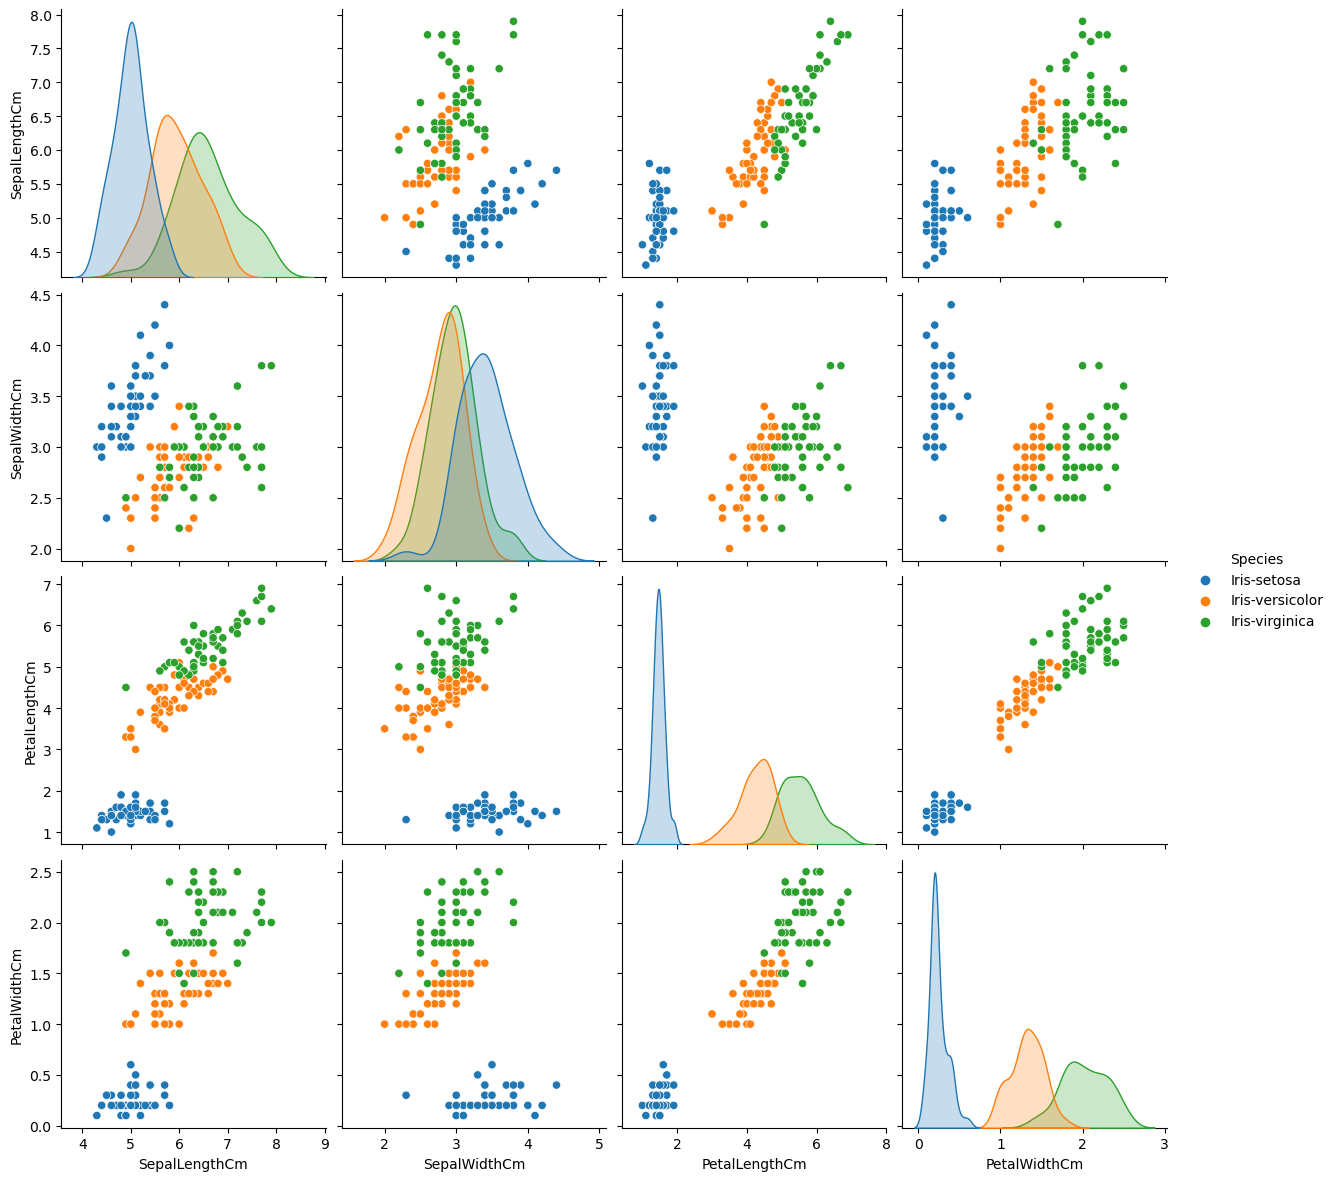

In [39]:
# Column relationship using Pairplots
sns.pairplot(df,hue="Species",height=3);

# Model Training and Evaluation

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


In [24]:
# logistic Regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
# model training
model.fit(x_train, y_train)
# predictions
y_pred = model.predict(x_test)

# Summary of predictions made by the classifier
print("Classification_Report: \n", classification_report(y_pred, y_test))

print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))

Classification_Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Confusion matrix: 
 [[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]


In [26]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [27]:
# Knn: K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [28]:
# model training
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Summary of predictions made by the classifier
print("Classification_Report: \n", classification_report(y_pred, y_test))

print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Classification_Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45

Confusion matrix: 
 [[17  0  0]
 [ 0 12  2]
 [ 0  1 13]]


In [29]:
# print metric to get performance
print("Accuracy: ",knn.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [31]:
# model training
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

# Summary of predictions made by the classifier
print("Classification_Report: \n", classification_report(y_pred, y_test))

print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))

Classification_Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.86      0.86      0.86        14
 Iris-virginica       0.86      0.86      0.86        14

       accuracy                           0.91        45
      macro avg       0.90      0.90      0.90        45
   weighted avg       0.91      0.91      0.91        45

Confusion matrix: 
 [[17  0  0]
 [ 0 12  2]
 [ 0  2 12]]


In [32]:
# print metric to get performance
print("Accuracy: ",tree.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [33]:
# save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [34]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
26,5.0,3.4,1.6,0.4
123,6.3,2.7,4.9,1.8
102,7.1,3.0,5.9,2.1
97,6.2,2.9,4.3,1.3
110,6.5,3.2,5.1,2.0


In [35]:
load_model = pickle.load(open(filename,'rb'))

In [36]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)